https://www.ijert.org/research/an-immediate-formula-for-the-radius-of-curvature-of-a-bimetallic-strip-IJERTV2IS120106.pdf 
![Alt text](Timoshenko_bimetal_formula.png)

We make the substitution to directly replace (α₁ - α₂)(ΔT) with (ε₁ - ε₂) the differential strain

In [1]:
import numpy as np

def calculate_timoshenko_curvature(h1, h2, E1, E2, strain1, strain2, C):
    """
    Calculate the curvature of a bimorph actuator using the Timoshenko model.
    
    Parameters:
    -----------
    h1, h2 : float
        Thicknesses of layers 1 and 2 (meters)
    E1, E2 : float
        Young's moduli of layers 1 and 2 (Pa)
    strain1, strain2 : float
        Strain reduction of layers 1 and 2 (dimensionless)
        
    Returns:
    --------
    kappa : float
        Curvature (1/meter)
    radius : float
        Radius of curvature (meter)
    """
    # Calculate the differential strain
    delta_strain = strain1 - strain2
    
    # Calculate thickness ratio n
    n = h1 / h2
    
    # Calculate modulus-thickness ratio m
    m = (E1 * h1) / (E2 * h2)
    
    # Total thickness
    h = h1 + h2
    
    # Calculate curvature using the Timoshenko equation
    numerator = 6 * delta_strain * (1 + m)**2
    denominator = h * (3 * (1 + m)**2 + (1 + m*n) * (m**2 + 1/(m*n)))
    
    kappa = C * numerator / denominator
    radius = 1 / kappa if kappa != 0 else float('inf')
    
    return kappa, radius

In [2]:
import matplotlib.pyplot as plt
def piecewise_linear(x, x0, y0, slope):
    return np.piecewise(
        x, [x <= x0, x > x0], [lambda x: slope * (x - x0) + y0, lambda x: y0]
    )

def plot_piecewise_fit(x_data, params, y_data=None, title="Piecewise Linear Fit"):
    x0, y0, slope = params
    x_fit = np.linspace(min(x_data), max(x_data), 1000)
    y_fit = piecewise_linear(x_fit, x0, y0, slope)
    plt.figure(figsize=(10, 6))
    if y_data is not None:
        plt.scatter(x_data, y_data, color="b", label="Data")
    plt.plot(
        x_fit,
        y_fit,
        "r-",
        label=f"Fitted Function x0({x0:.4g}) y0 ({y0:.4g}) slope ({slope:.4g})",
    )
    plt.axvline(x=x0, color="g", linestyle="--", label=f"Breakpoint (x={x0:.2f})")
    plt.axhline(y=y0, color="k", linestyle=":", label=f"Steady value (y={y0:.2f})")
    plt.xlabel("Time (minutes)")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [36]:
TOTAL_TIME = 20 # minutes

#TODO: maybe taking dry Young's modulus will be necessary...
E_WT = 16.3e6  #converting MPa to Pa
E_BslA = 6.2e6
# h_WT = 2.3e-3 # converting mm to m
h_WT = 10.0e-3 # converting mm to m
h_BslA = 0.3e-3 
L_beam = 20e-3
C = 15 # this needs to be fit to the data

time_range = np.linspace(0, TOTAL_TIME, TOTAL_TIME * 2)
WT_strain = piecewise_linear(time_range, 14.38153001, -0.76155718, -0.05372784)
BslA_strain = piecewise_linear(time_range, 1.05555108, -0.12121155, -0.10489566)

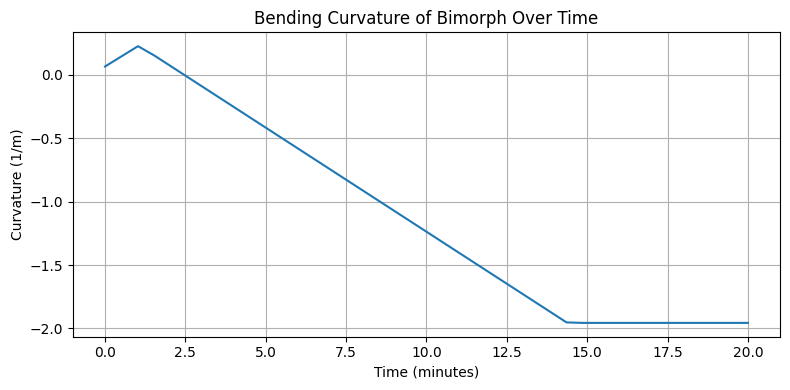

In [37]:
curvatures = []
radii = []

for s1, s2 in zip(WT_strain, BslA_strain):
    kappa, radius = calculate_timoshenko_curvature(h_WT, h_BslA, E_WT, E_BslA, s1, s2, C)
    curvatures.append(kappa)
    radii.append(radius)

curvatures = np.array(curvatures)
radii = np.array(radii)

# Step 7: Plot curvature over time
plt.figure(figsize=(8, 4))
plt.plot(time_range, curvatures)
plt.xlabel("Time (minutes)")
plt.ylabel("Curvature (1/m)")
plt.title("Bending Curvature of Bimorph Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

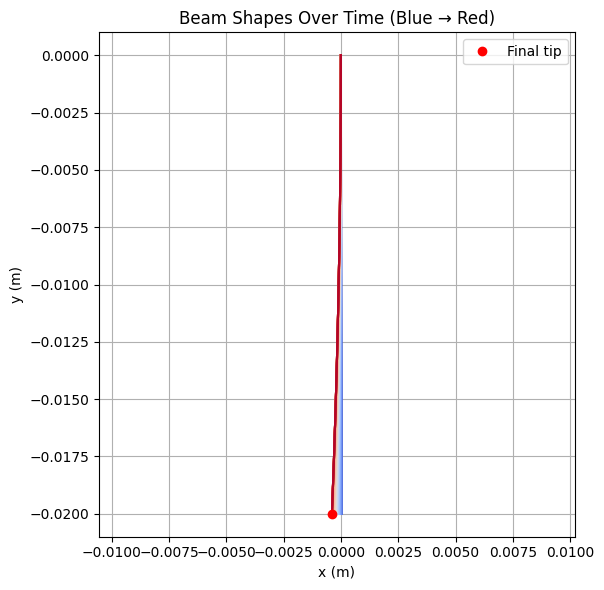

Final tip position: x = 0.01999 m, y = -0.00039 m


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Beam length
s_vals = np.linspace(0, L_beam, 200)  # arc-length along beam

# Select time points to visualize (early to late)
sample_indices = np.linspace(0, len(curvatures)-1, 50, dtype=int)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(sample_indices)))

plt.figure(figsize=(6, 6))
for idx, color in zip(sample_indices, colors):
    kappa = curvatures[idx]

    if np.abs(kappa) < 1e-6:
        # Approximate straight beam
        x = s_vals
        y = np.zeros_like(s_vals)
    else:
        R = 1 / kappa
        theta = s_vals / R
        x = R * np.sin(theta)
        y = R * (1 - np.cos(theta))

    plt.plot(y, -x, color=color)

# Highlight the tip position of the final beam
final_kappa = curvatures[sample_indices[-1]]
if np.abs(final_kappa) > 1e-6:
    R_tip = 1 / final_kappa
    theta_tip = L_beam / R_tip
    x_tip = R_tip * np.sin(theta_tip)
    y_tip = R_tip * (1 - np.cos(theta_tip))
else:
    x_tip = L_beam
    y_tip = 0

plt.plot(y_tip, -x_tip, 'o', color='red', label='Final tip')

# Plot formatting
plt.axis('equal')
plt.title("Beam Shapes Over Time (Blue → Red)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Final tip position: x = {x_tip:.5f} m, y = {y_tip:.5f} m")


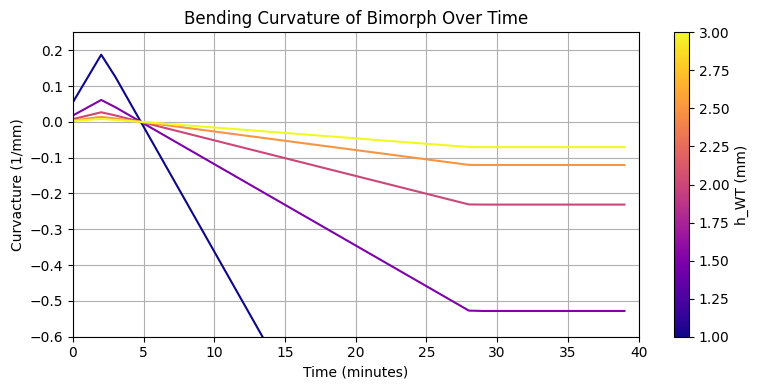

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# Example data: Replace this with your actual curvature data
# Create a list of h_WT values to loop over
h_WT_values = [1, 1.5, 2, 2.5, 3] #np.linspace(1, 10.0, 50)

# Create a colormap and normalization for color scaling
cmap = cm.plasma
norm = colors.Normalize(vmin=min(h_WT_values), vmax=max(h_WT_values))  # Range of h_WT values

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the curvature over time for each h_WT value
for h_WT in h_WT_values:
    curvatures, radii = [], []
    for s1, s2 in zip(WT_strain, BslA_strain):
        kappa, radius = calculate_timoshenko_curvature(h_WT / 1000, h_BslA, E_WT, E_BslA, s1, s2, C)
        curvatures.append(kappa / 1000)  # Convert curvature to 1/mm
        radii.append(radius * 1000)
    ax.plot(range(len(curvatures)), curvatures, label=f"h_WT = {h_WT:.5f} mm", color=cmap(norm(h_WT)))

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for colorbar
fig.colorbar(sm, ax=ax, label="h_WT (mm)")  # Pass ax to colorbar

# Labels, title, and grid
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Curvacture (1/mm)")
ax.set_title("Bending Curvature of Bimorph Over Time")
ax.grid(True)
# ax.legend()

ax.set_ylim([-0.6, 0.25])
ax.set_xlim([0, 40])  



# Adjust layout to fit everything
plt.tight_layout()
plt.show()


In [ ]:
# import numpy as np
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Example data: Replace this with your actual curvature data
# # Create a list of h_WT values to loop over
# h_WT_values = [1, 2, 3, 4, 5]#np.linspace(1e-3, 10.0e-3, 100)

# # Create a colormap and normalization for color scaling
# cmap = 'Viridis'  # Use Plotly's predefined colormap
# norm = np.linspace(min(h_WT_values), max(h_WT_values), len(h_WT_values))  # Normalize h_WT values

# # Function to convert a tuple (r, g, b, a) into an rgb string
# def rgba_to_rgb_string(rgba):
#     return f'rgb({int(rgba[0] * 255)}, {int(rgba[1] * 255)}, {int(rgba[2] * 255)})'

# # Create a subplot figure
# fig = make_subplots(rows=1, cols=1)

# # Plot the curvature over time for each h_WT value
# for idx, h_WT in enumerate(h_WT_values):
#     # Replace this with your actual curvature data computation
#     curvatures = []
#     radii = []

#     for s1, s2 in zip(WT_strain, BslA_strain):
#         kappa, radius = calculate_timoshenko_curvature(h_WT / 1000, h_BslA, E_WT, E_BslA, s1, s2, C)
#         curvatures.append(kappa)
#         radii.append(radius)
    
#     # Get the RGBA color for this h_WT value
#     rgba = plt.cm.viridis(norm[idx])  # Get RGBA tuple
#     color_str = rgba_to_rgb_string(rgba)  # Convert to rgb string
    
#     # Plot the curvature for the current h_WT value
#     fig.add_trace(go.Scatter(
#         x=list(range(len(curvatures))),
#         y=curvatures,
#         mode='lines',
#         name=f"h_WT = {h_WT:.5f} mm",
#         line=dict(color=color_str),  # Set color as rgb string
#     ))

# # Add colorbar as a separate trace
# fig.update_layout(
#     title="Bending Curvature of Bimorph Over Time",
#     xaxis_title="Time (minutes)",
#     yaxis_title="Curvature (1/mm)",
#     coloraxis=dict(
#         colorscale=cmap,
#         cmin=min(h_WT_values),
#         cmax=max(h_WT_values),
#         colorbar=dict(title="h_WT (mm)")
#     ),
#     showlegend=True
# )

# fig.show()
